In [1]:
using FFTW, Plots, NAJ, LaTeXStrings

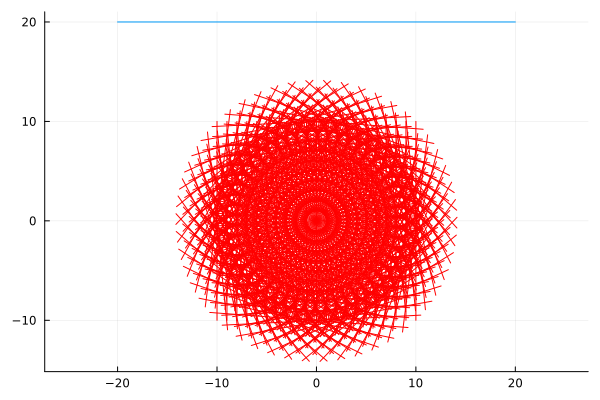

In [23]:
source = -10:10



X = [[x, -10] for x in source] # 빔의 위치
T = [[x, 10] for x in source]  # 검출기 위치

function rot(P, θ)
    x, y = P[1], P[2]
    return [x*cos(θ) + y*sin(θ), -x*sin(θ) + y*cos(θ)]
end

p1=plot([-20, 20], [20, 20], label =:none, aspect_ratio = :equal)

for θ in 0:π/√615:π
    Y = [rot(x, θ) for x in X]
    S = [rot(y, θ) for y in T]
    for ind in eachindex(X)
        plot!([Y[ind][1], S[ind][1]], [Y[ind][2], S[ind][2]] , label = :none, color = :red)
    end
end
plot(p1)


In [8]:
rot(X[1], -π/2)

2-element Vector{Float64}:
  10.0
 -10.0

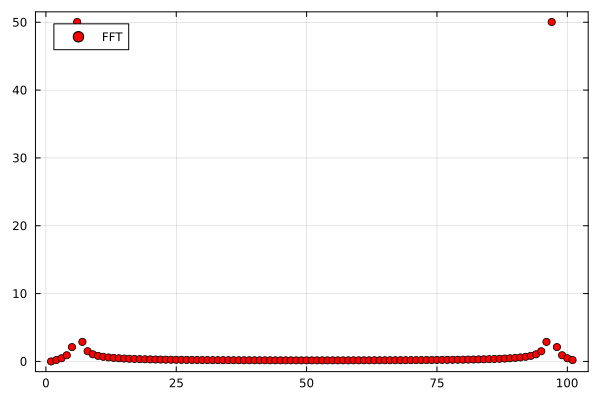

In [38]:
p2 = scatter((1:length(y)), abs.(fy1), color=:red, frame = :box, label = "FFT")

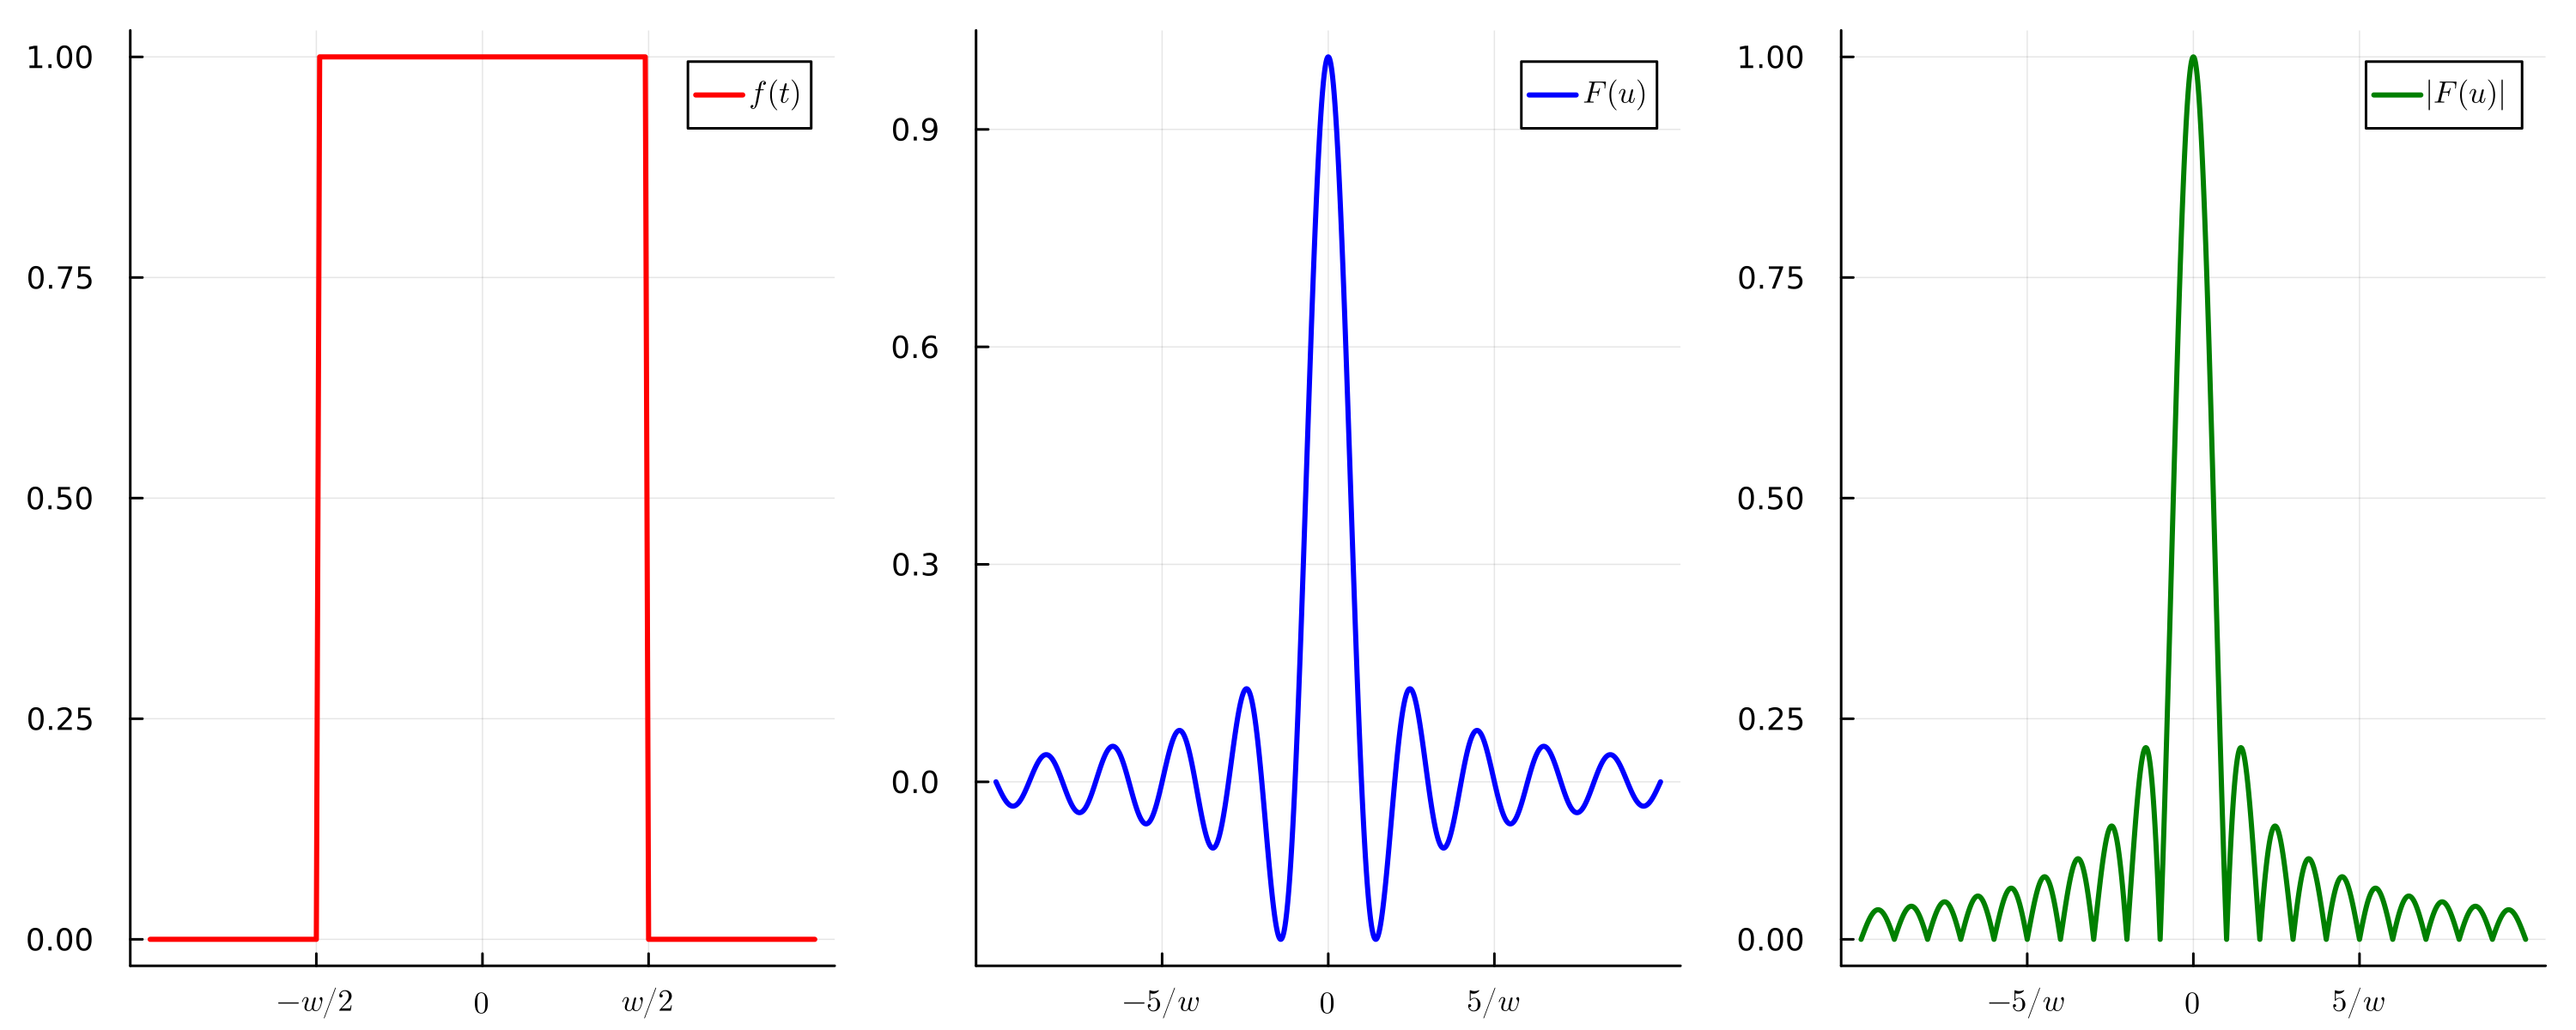

In [5]:
function four_rect(u)
    if abs(u)<1.0e-10
        return one(u)
    else
        return sin(π * u )/(π * u)
    end
end
t = -1:0.01:1
f = zeros(length(t))
f[abs.(t).<0.5] .= 1.0
p1=plot(t, f, xticks =([-0.5, 0, 0.5], [L"-w/2", L"0", L"w/2"]), lw=2, lc=:red, label = L"f(t)")
t2 = -10:0.01:10
p2 = plot(t2, four_rect.(t2), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :blue, lw=2, label = L"F(u)")
p3 = plot(t2, abs.(four_rect.(t2)), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :green, lw=2, label = L"|F(u)|")


plot(p1, p2, p3, layout=(1, 3), size = (1000, 400), dpi=300)

#savefig("fourier_of_rect.png")

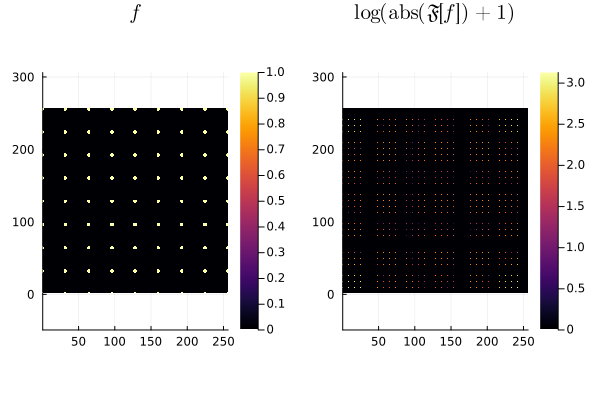

In [18]:
A= zeros(Float64, (256, 256))
for x ∈ 1:256, y ∈ 1:256
    xp, yp = 32*round(x/32), 32*round(y/32)
    if (x-xp)^2 + (y-yp)^2 < 8
        A[x, y] = 1.0
    end
end

p1=heatmap(A, aspect_ratio = :equal, size=(600, 400), title= L"f")
Af = fft(A)
p2 = heatmap(log10.(abs.(Af) .+ 1.0), aspect_ratio = :equal, size= (600, 400), title = L"\log (\textrm{abs}(\mathfrak{F}[f]) +1)")

plot(p1, p2)


In [169]:
x, y =825, 769
p, yp = 64*round(x/64), 64*round(y/64)

(832.0, 768.0)

In [174]:
extrema(abs.(Af))

(0.0, 11520.0)

In [ ]:
fft([1,1,1,1,1])

In [ ]:
ifft(fft([0,0,1,0,0]))

In [ ]:
ifft(fft([1,0,0,0,0]))